<a href="https://colab.research.google.com/github/Bode-Data/PortfolioProjects/blob/main/visualization_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('combined_data_all.csv')

In [ ]:
df.head()

,Cust_Id,Rating,Movie_Id,Movie_ID,year,title
0,1488844,3.0,1,1,2003,Dinosaur Planet
1,822109,5.0,1,1,2003,Dinosaur Planet
2,885013,4.0,1,1,2003,Dinosaur Planet
3,30878,4.0,1,1,2003,Dinosaur Planet
4,823519,3.0,1,1,2003,Dinosaur Planet


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22180906 entries, 0 to 22180905
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
 3   Movie_ID  int64  
 4   year      int64  
 5   title     object 
dtypes: float64(1), int64(4), object(1)
memory usage: 1015.4+ MB


In [ ]:
df.drop(columns='Movie_ID',inplace=False)

,Cust_Id,Rating,Movie_Id,year,title
0,1488844,3.0,1,2003,Dinosaur Planet
1,822109,5.0,1,2003,Dinosaur Planet
2,885013,4.0,1,2003,Dinosaur Planet
3,30878,4.0,1,2003,Dinosaur Planet
4,823519,3.0,1,2003,Dinosaur Planet
...,...,...,...,...,...
22180901,2028108,3.0,4207,1980,The Blues Brothers: Extended Cut
22180902,332681,5.0,4207,1980,The Blues Brothers: Extended Cut
22180903,1899193,5.0,4207,1980,The Blues Brothers: Extended Cut
22180904,1058977,3.0,4207,1980,The Blues Brothers: Extended Cut


##Sparsity of dataset


Sparsity: 98.88%


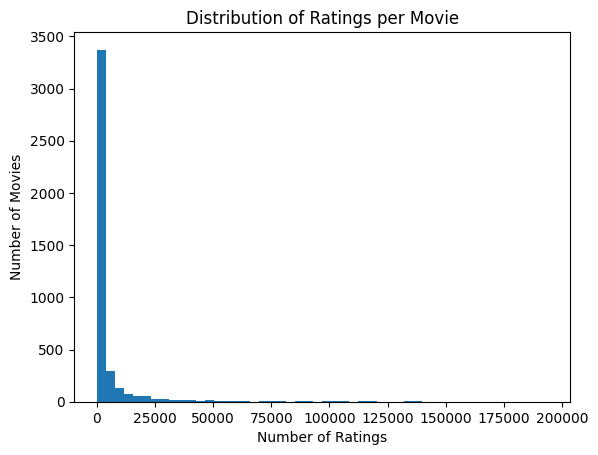

In [ ]:
# Calculate the sparsity of the dataset
num_ratings = df.shape[0]
num_movies = df['Movie_Id'].nunique()
num_customers = df['Cust_Id'].nunique()
sparsity = 1 - (num_ratings / (num_movies * num_customers))

# Display the sparsity as a percentage
print(f"Sparsity: {sparsity * 100:.2f}%")

# Plot a histogram of the number of ratings per movie
ratings_per_movie = df.groupby('Movie_Id')['Rating'].count().values
plt.hist(ratings_per_movie, bins=50)
plt.title('Distribution of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
print(num_ratings,num_movies)

22180906 4207


### Customer Id

In [ ]:
df['Cust_Id'].nunique()

469866

In [ ]:
Total_no_rating_cust = df.groupby('Cust_Id')['Rating'].count()

In [ ]:
top_10_cust_most_rating = Total_no_rating_cust.nlargest(10)

In [ ]:
top_10_cust_least_rating = Total_no_rating_cust.nsmallest(10)


In [ ]:
print(top_10_cust_most_rating)

Cust_Id
305344     4174
387418     4134
2439493    3930
1664010    3757
2118461    3521
1639792    2344
1314869    2315
1461435    2288
1932594    2104
2606799    2100
Name: Rating, dtype: int64


In [ ]:
print(top_10_cust_least_rating)


Cust_Id
133     1
215     1
479     1
515     1
692     1
844     1
1050    1
1398    1
1415    1
1462    1
Name: Rating, dtype: int64


In [ ]:
top_10_cust_most_rating??

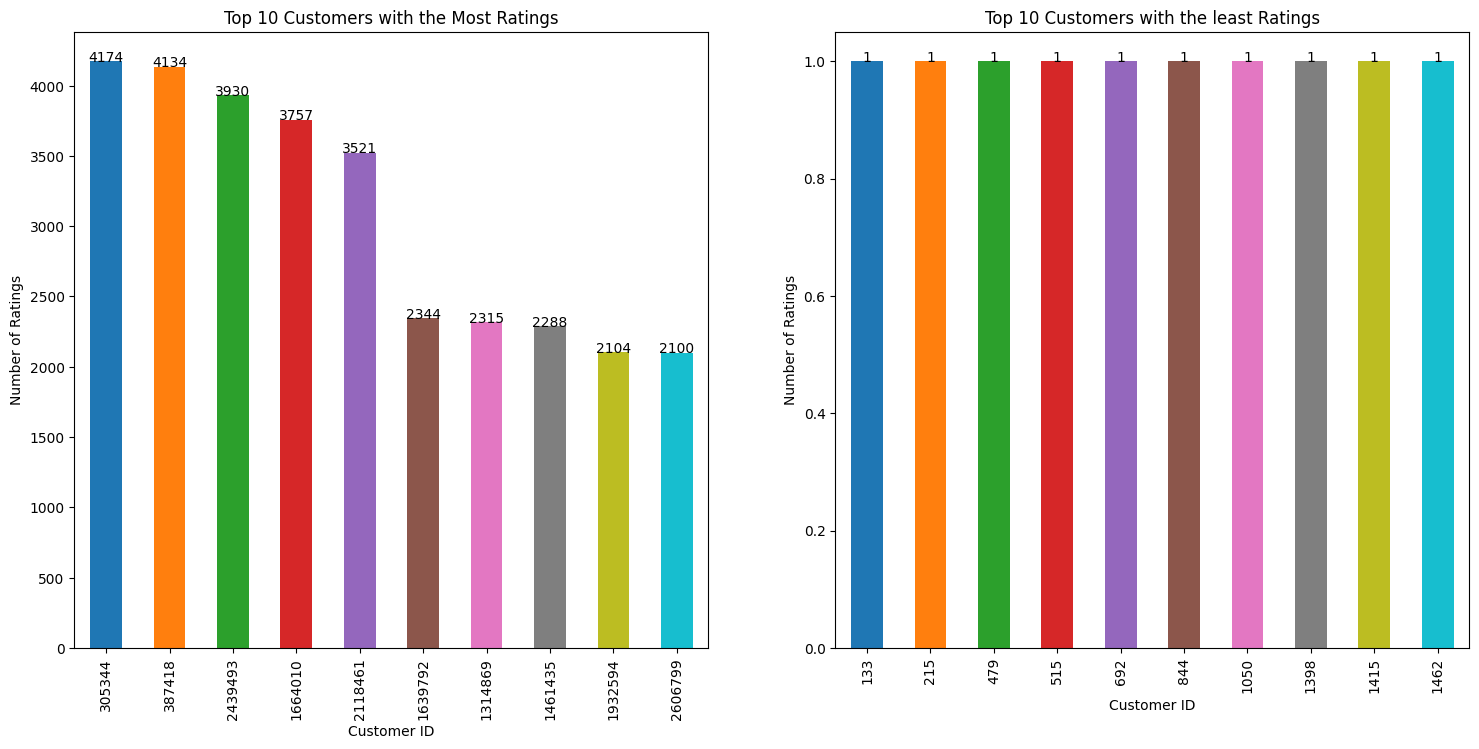

In [ ]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]



f, ax = plt.subplots(1, 2, figsize=(18, 8))
Total_no_rating_cust.nlargest(10).plot.bar(color=colors,ax=ax[0])
ax[0].set_xlabel("Customer ID")
ax[0].set_ylabel("Number of Ratings")
# add the counts at the top of each bar
for i, count in enumerate(Total_no_rating_cust.nlargest(10).values):
    ax[0].text(i, count, count, ha='center', fontsize=10)

ax[0].set_title("Top 10 Customers with the Most Ratings")
Total_no_rating_cust.nsmallest(10).plot.bar(color=colors,ax=ax[1])
ax[1].set_xlabel("Customer ID")
ax[1].set_ylabel("Number of Ratings")

# add the counts at the top of each bar
for i, count in enumerate(Total_no_rating_cust.nsmallest(10).values):
    ax[1].text(i, count, count, ha='center', fontsize=10)
ax[1].set_title("Top 10 Customers with the least Ratings")
plt.show()

###Rating



In [ ]:
df['Rating'].value_counts()

4.0    7438174
3.0    6368415
5.0    5081613
2.0    2258317
1.0    1034387
Name: Rating, dtype: int64

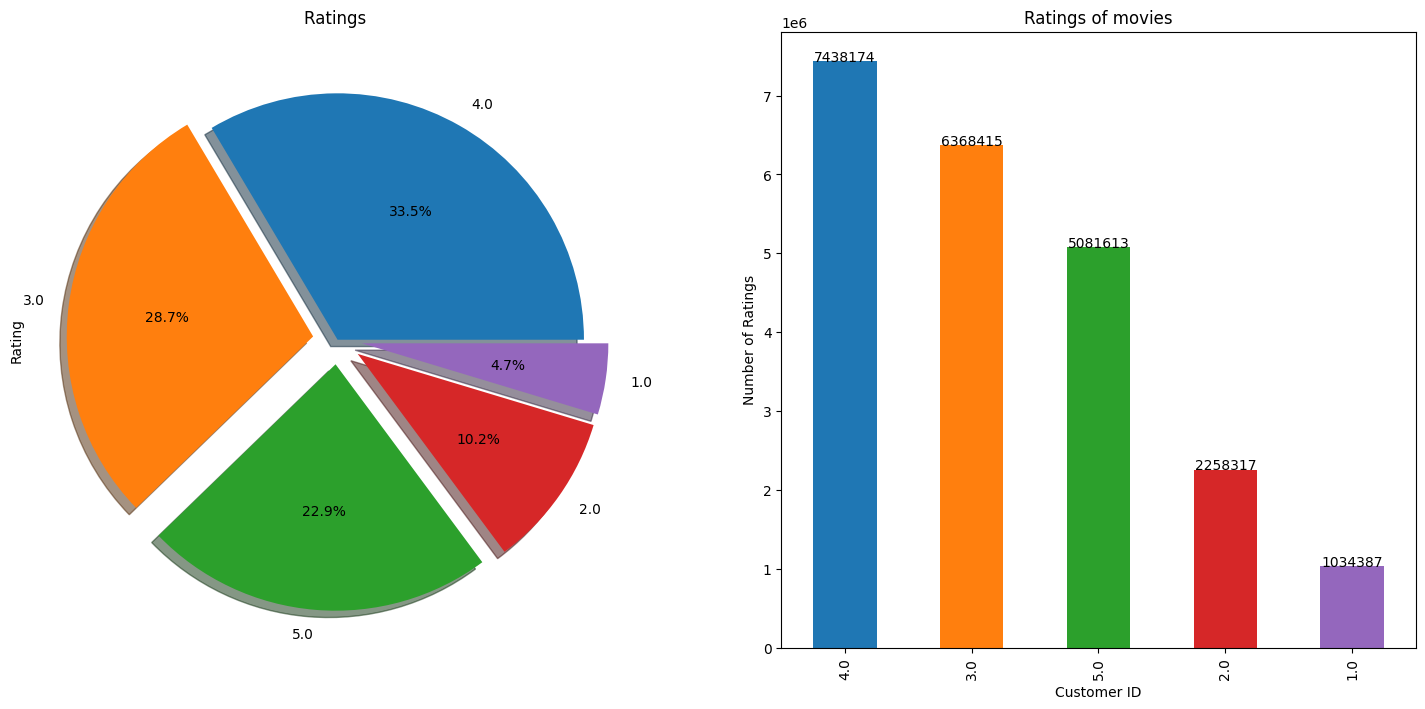

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Rating'].value_counts().plot.pie(
    explode=[0, 0.1,0.1,0.1,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Ratings ')
df['Rating'].value_counts().plot.bar(color=colors,ax=ax[1])
ax[1].set_xlabel("Customer ID")
ax[1].set_ylabel("Number of Ratings")

# add the counts at the top of each bar
for i, count in enumerate(df['Rating'].value_counts()):
    ax[1].text(i, count, count, ha='center', fontsize=10)
ax[1].set_title("Ratings of movies")
plt.show()
ax[1].set_title('Rating')
plt.show()

In [ ]:
Total_no_rating_movie = df.groupby('title')['Rating'].count()


In [ ]:
print(Total_no_rating_movie)

title
'N Sync: 'N the Mix             497
'N Sync: PopOdyssey Live         92
... And God Spoke               180
10                             4928
10 Minute Solution: Pilates     163
                               ... 
Zig Zag: Special Edition        512
Zigzag                           82
Zombie 3                        163
Zorro The Gay Blade            2026
s-Cry-ed                        817
Name: Rating, Length: 4187, dtype: int64


In [ ]:
top_10_most_rated_movies = Total_no_rating_movie.nlargest(10)
top_10_least_rated_movies = Total_no_rating_movie.nsmallest(10)


In [ ]:
print(f'Top 10 most rated movies are:{top_10_most_rated_movies}')
print(f'Top 10 least rated movies are:{top_10_least_rated_movies}')


Top 10 most rated movies are:title
Pirates of the Caribbean: The Curse of the Black Pearl    193941
What Women Want                                           162597
Bruce Almighty                                            160454
American Beauty                                           154832
Shrek 2                                                   153996
Lord of the Rings: The Fellowship of the Ring             149866
50 First Dates                                            145519
Finding Nemo (Widescreen)                                 140979
The Wedding Planner                                       140154
The Last Samurai                                          139428
Name: Rating, dtype: int64
Top 10 least rated movies are:title
The Blue                                                   1
Expo: Magic of the White City                             42
Haven                                                     43
Predator Island                                           45
Karl Rov

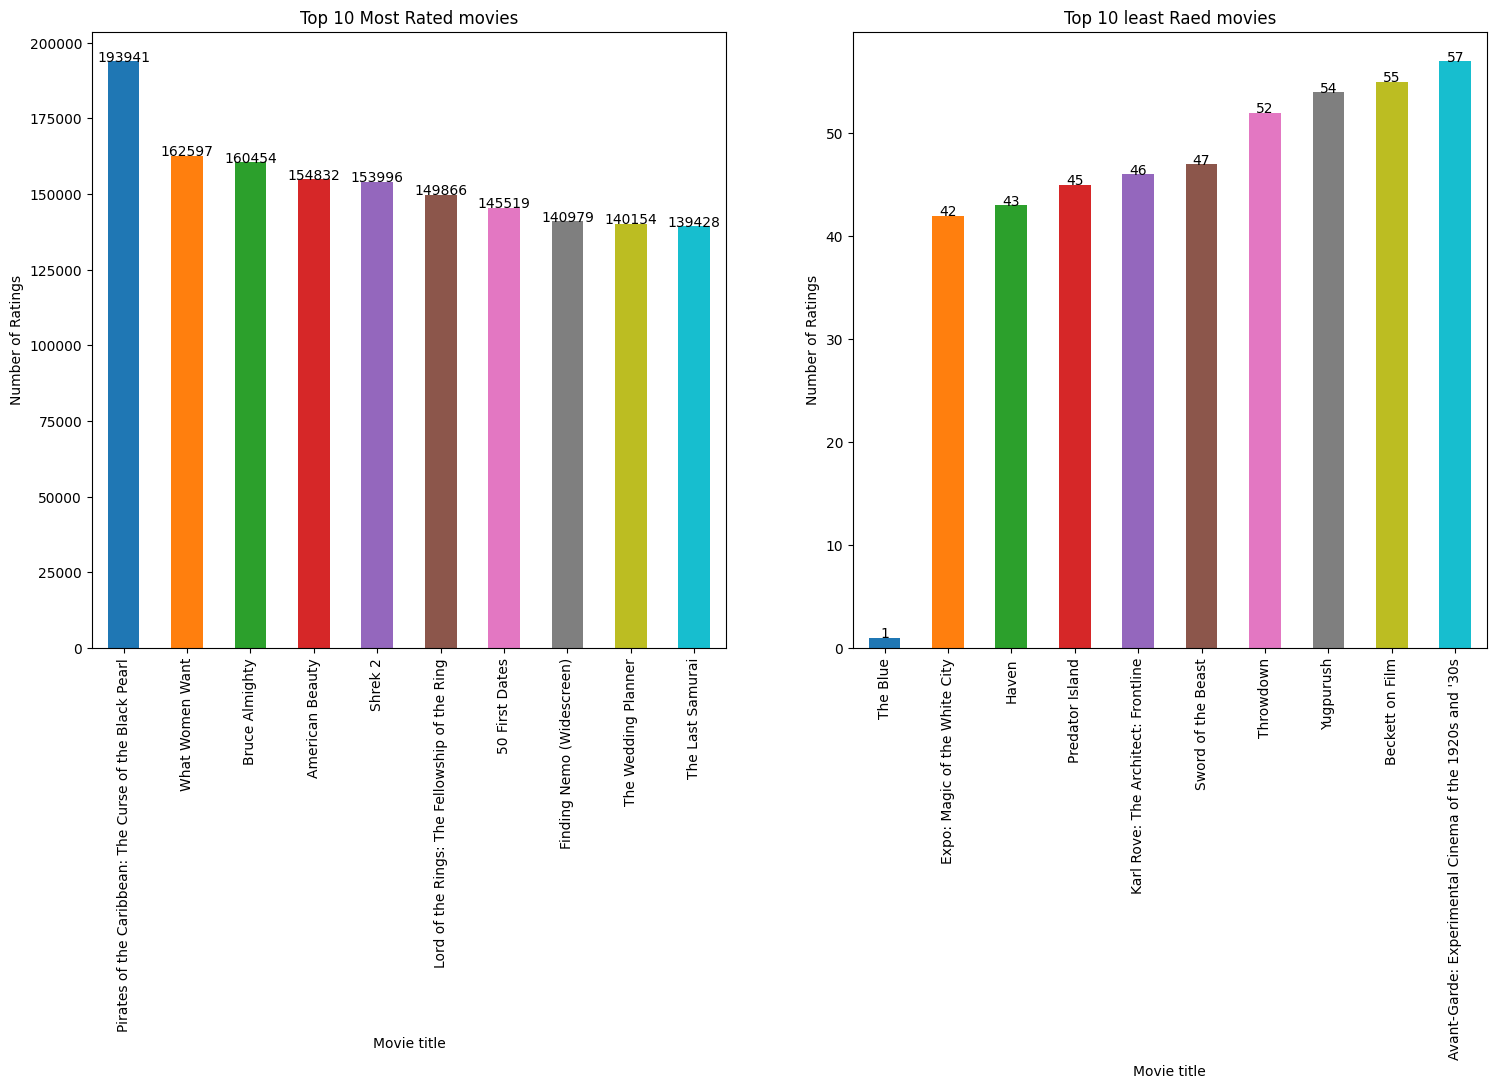

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
Total_no_rating_movie.nlargest(10).plot.bar(color=colors,ax=ax[0])
ax[0].set_xlabel("Movie title")
ax[0].set_ylabel("Number of Ratings")
# add the counts at the top of each bar
for i, count in enumerate(Total_no_rating_movie.nlargest(10).values):
    ax[0].text(i, count, count, ha='center', fontsize=10)

ax[0].set_title("Top 10 Most Rated movies")
Total_no_rating_movie.nsmallest(10).plot.bar(color=colors,ax=ax[1])
ax[1].set_xlabel("Movie title")
ax[1].set_ylabel("Number of Ratings")

# add the counts at the top of each bar
for i, count in enumerate(Total_no_rating_movie.nsmallest(10).values):
    ax[1].text(i, count, count, ha='center', fontsize=10)
ax[1].set_title("Top 10 least Rated movies")
plt.show()

In [ ]:
most_rated = df[df['Rating']==5].groupby(['Movie_Id', 'title'])['Rating'].count().reset_index().sort_values('Rating', ascending=False)
top_5_5rated_movies = most_rated.head(5)


In [ ]:
print(top_5_5rated_movies)

      Movie_Id                                              title  Rating
2449      2452      Lord of the Rings: The Fellowship of the Ring   94655
1902      1905  Pirates of the Caribbean: The Curse of the Bla...   82549
3959      3962                          Finding Nemo (Widescreen)   79447
2779      2782                                         Braveheart   71154
3935      3938                                            Shrek 2   64955


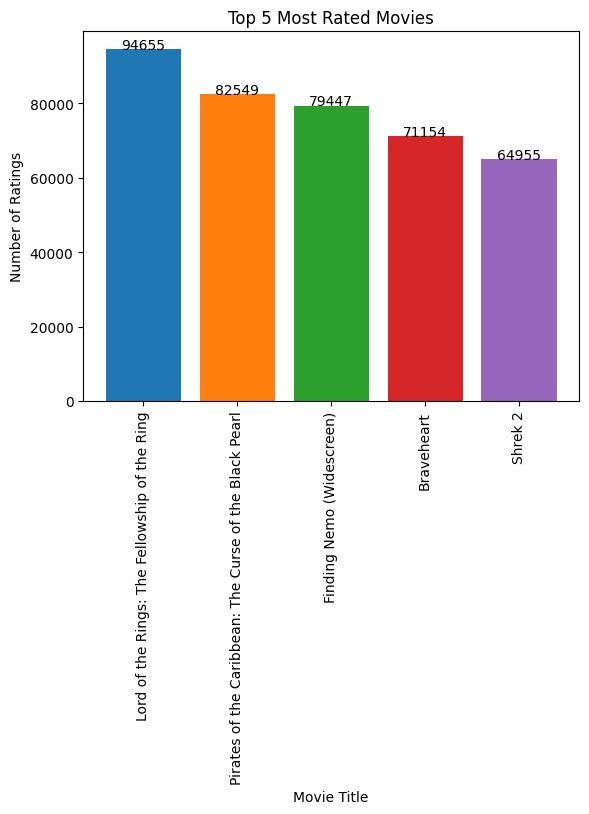

In [ ]:
plt.bar(top_5_5rated_movies['title'], top_5_5rated_movies['Rating'],color=colors)
plt.xticks(rotation=90)
plt.title('Top 5 Most 5-Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')

for i, v in enumerate(top_5_5rated_movies['Rating']):
    plt.text(i, v, str(v), color='black', ha='center')

plt.show()

In [ ]:
one_star = df[df['Rating'] == 1].groupby(['Movie_Id', 'title'])['Rating'].count().reset_index().sort_values('Rating', ascending=False)
top_5_1rated_movies = one_star.head(5)

In [ ]:
print(top_5_1rated_movies)

      Movie_Id                title  Rating
3149      3151    Napoleon Dynamite   13365
1143      1145  The Wedding Planner   12194
2150      2152      What Women Want    8855
4121      4123          Patch Adams    8375
3754      3756        About Schmidt    8334


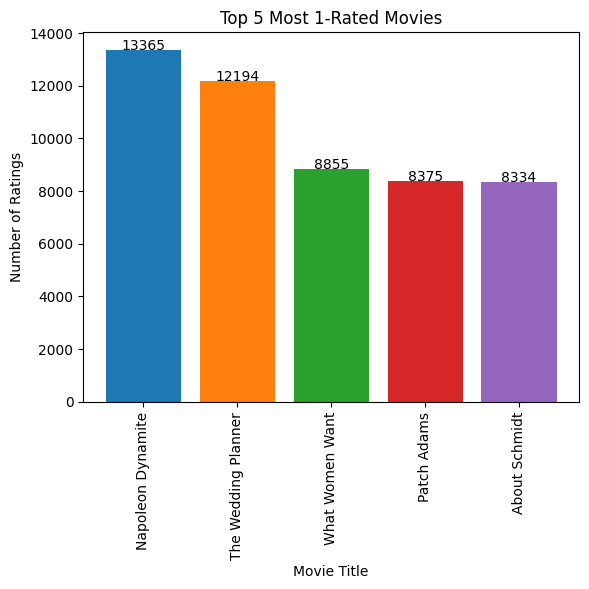

In [ ]:
plt.bar(top_5_1rated_movies['title'], top_5_1rated_movies['Rating'],color=colors)
plt.xticks(rotation=90)
plt.title('Top 5 Most 1-Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')

for i, v in enumerate(top_5_1rated_movies['Rating']):
    plt.text(i, v, str(v), color='black', ha='center')

plt.show()

### Dates

In [ ]:
most_released_date = df['year'].value_counts().nlargest(10)
least_released_date = df['year'].value_counts().nsmallest(10)

In [ ]:
print(most_released_date)
print(least_released_date)

2004    2818096
2003    2757437
2002    1818143
2001    1799036
2000    1159641
1999    1004287
1998     827111
1995     765178
1994     760883
1992     652739
Name: year, dtype: int64
1926    107
1915    127
1917    138
1922    196
1928    498
1921    650
1933    708
1918    832
1925    862
1937    890
Name: year, dtype: int64


[Text(0.5, 1.0, 'Least Released date of movies ')]

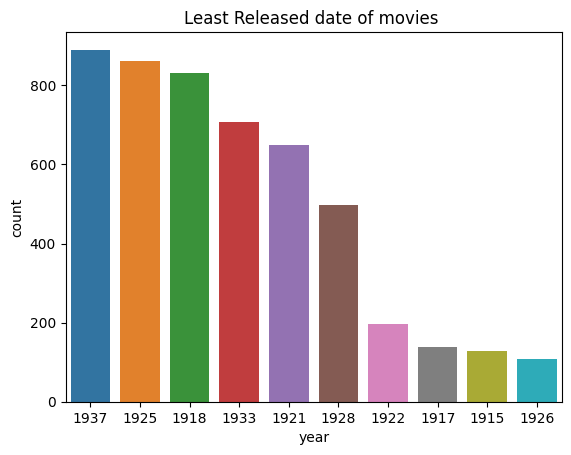

In [ ]:
sns.countplot(data = df,x = 'year', order=df.year.value_counts().iloc[-10:].index ).set(title='Least Released date of movies ')

[Text(0.5, 1.0, 'Most Released date of movies ')]

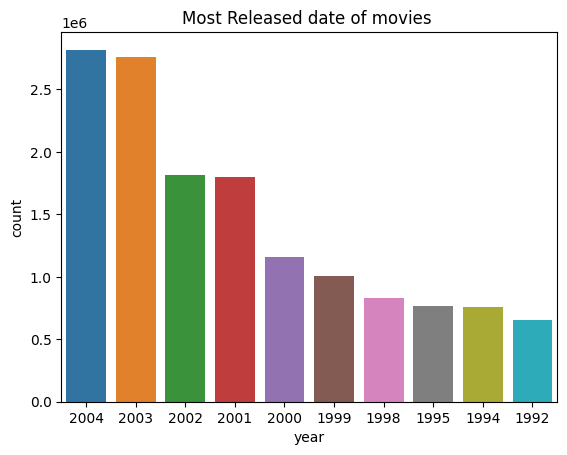

In [ ]:
sns.countplot(data = df,x = 'year', order=df.year.value_counts().iloc[:10].index ).set(title='Most Released date of movies ')